In [14]:
#import libraries and load dataset
#importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
#Load the datasets
math_df=pd.read_csv(r"C:\Users\dines\Downloads\student-maths.csv")
port_df=pd.read_csv(r"C:\Users\dines\Downloads\student-portuguese.csv")
#add subject column
math_df['subject']='Math'
port_df['subject']='Portuguese'
#combine datasets
df=pd.concat([math_df, port_df], ignore_index=True)
print("combined dataset shape:", df.shape)
#check counts per subject
print(df['subject'].value_counts())
df.head()

combined dataset shape: (1044, 34)
subject
Portuguese    649
Math          395
Name: count, dtype: int64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


In [6]:
#check for null values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
subject       0
dtype: int64

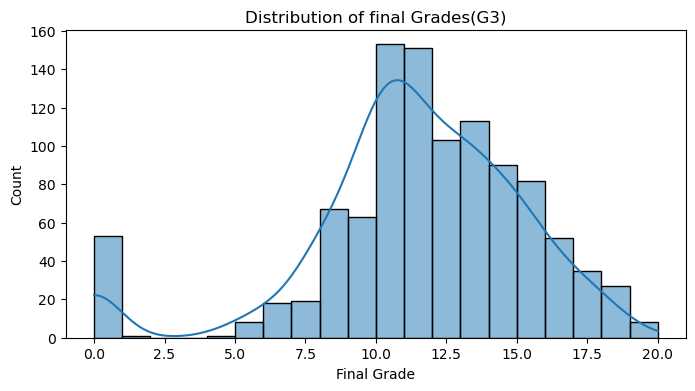

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


In [16]:
#it is time to work on visualization
#didtribution of final grades
plt.figure(figsize=(8,4))
seb.histplot(df['G3'], bins=20, kde=True)
plt.title("Distribution of final Grades(G3)")
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.show()
df.head()

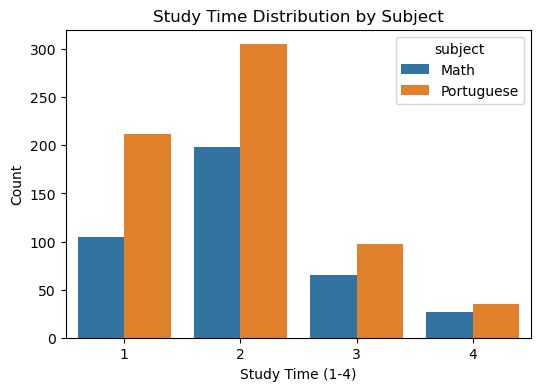

In [10]:
# Study time across subjects
plt.figure(figsize=(6, 4))
seb.countplot(data=df, x='studytime', hue='subject')
plt.title("Study Time Distribution by Subject")
plt.xlabel("Study Time (1-4)")
plt.ylabel("Count")
plt.show()

In [22]:
#here we are creating a binary variable to enlist pass or file
df['pass'] = (df['G3'] >= 10).astype(int)
#here we drop the G3 and include 0 and 1 for fail and pass candidates
df.drop('G3', axis=1, inplace=True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,subject,pass
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,0,0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,0,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,0,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,0,1


In [24]:
# Encode categorical features
#it is used for machine learning calculations
label_enc = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_enc.fit_transform(df[col])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,subject,pass
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,0,0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,0,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,0,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,0,1


In [26]:
# Feature and target split
X = df.drop('pass', axis=1)
y = df['pass']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


In [30]:
# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Random Forest", y_test, rf_preds)



Logistic Regression Evaluation:
Accuracy: 0.8755980861244019
F1 Score: 0.9166666666666666
Confusion Matrix:
 [[ 40  20]
 [  6 143]]

Random Forest Evaluation:
Accuracy: 0.8899521531100478
F1 Score: 0.9255663430420712
Confusion Matrix:
 [[ 43  17]
 [  6 143]]


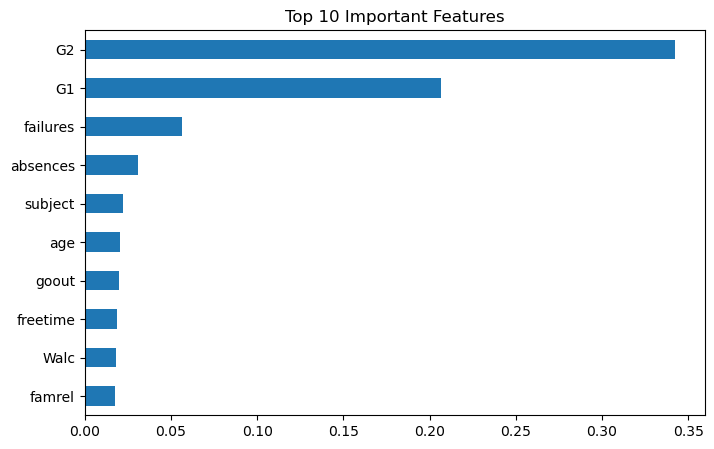

In [32]:
# Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().tail(10).plot(kind='barh', figsize=(8, 5))
plt.title("Top 10 Important Features")
plt.show()
